In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('CAFE')
from CAFE import utils

In [3]:
import graph_analysis
from graph_analysis import CommunityAnalyzer
from community import community_louvain

import networkx as nx
import numpy as np

In [4]:
kg = utils.load_kg('beauty')
analyzer = CommunityAnalyzer(kg.G)
G = analyzer.build_graph(kg.G)

In [5]:
from collections import Counter
partition = community_louvain.best_partition(G,random_state=42)
community_sizes = Counter(partition.values())
len(community_sizes)

25

# Degree Centrality

In [5]:
def product_degree_centrality(G, number_of_products = 592):
    number_of_products = number_of_products
    if len(G) <= 1:
            return {n: 1 for n in G}

    s = 1.0 / number_of_products
    centrality = {n: d * s for n, d in G.degree()}
    return centrality

In [23]:
import networkx as nx

def adjusted_degree_centrality(G, number_of_products=592):
    # Calculate raw degree centrality for all nodes
    raw_centrality = G.degree()

    # Count the total number of nodes except 'product' type nodes
    non_product_nodes = sum(1 for n in G.nodes if not n.startswith('product'))
    
    # Initialize the centrality dictionary
    centrality = {}

    # Apply different normalization based on node type
    for node, degree in raw_centrality:
        if node.startswith('product'):
            # Normalize by the number of non-product nodes
            centrality[node] = degree / non_product_nodes
        else:
            # Normalize by the number of products
            centrality[node] = degree / number_of_products

    return centrality


In [7]:
degree_centrality = adjusted_degree_centrality(G)

In [9]:
degree_centrality

{'product_0': 0.0014354767833601875,
 'category_0': 1.0,
 'category_4': 0.25675675675675674,
 'category_17': 0.0472972972972973,
 'category_18': 0.010135135135135136,
 'category_19': 0.005067567567567568,
 'brand_1': 0.006756756756756757,
 'word_849': 0.011824324324324325,
 'word_1065': 0.07263513513513513,
 'word_1418': 0.07432432432432433,
 'word_1627': 0.013513513513513514,
 'word_1715': 0.02027027027027027,
 'word_2079': 0.060810810810810814,
 'word_2161': 0.005067567567567568,
 'word_2637': 0.013513513513513514,
 'word_2930': 0.0016891891891891893,
 'word_2940': 0.09966216216216216,
 'word_3316': 0.010135135135135136,
 'word_3614': 0.0016891891891891893,
 'word_4268': 0.02027027027027027,
 'word_4421': 0.07939189189189189,
 'word_4837': 0.015202702702702704,
 'word_4852': 0.06756756756756757,
 'word_4866': 0.030405405405405407,
 'word_5320': 0.015202702702702704,
 'word_5653': 0.005067567567567568,
 'word_8247': 0.08108108108108109,
 'word_8524': 0.0033783783783783786,
 'word_9059

In [10]:
node_types = set()
node_type_centralities = {}

for node, centrality in degree_centrality.items():
    node_type, node_id = node.rsplit('_', 1)
    node_types.add(node_type)
    if node_type not in node_type_centralities:
        node_type_centralities[node_type] = []
    node_type_centralities[node_type].append((node, centrality))

In [11]:
sorted(node_type_centralities['product'], key=lambda x: x[1], reverse=True)

[('product_185', 0.02914896733557932),
 ('product_410', 0.028856012889995605),
 ('product_54', 0.025076900541965725),
 ('product_521', 0.02270396953273766),
 ('product_220', 0.022030174307895122),
 ('product_529', 0.021649333528636298),
 ('product_325', 0.021268492749377473),
 ('product_502', 0.019100629852058005),
 ('product_464', 0.019042038962941262),
 ('product_16', 0.01851472096089058),
 ('product_125', 0.017958107514281528),
 ('product_215', 0.017840925736048046),
 ('product_36', 0.017811630291489675),
 ('product_33', 0.01751867584590596),
 ('product_339', 0.016112494507104145),
 ('product_498', 0.01602460817342903),
 ('product_153', 0.015936721839753917),
 ('product_552', 0.015878130950637177),
 ('product_541', 0.01573165372784532),
 ('product_322', 0.015555881060495094),
 ('product_280', 0.015497290171378351),
 ('product_358', 0.015409403837703237),
 ('product_455', 0.015262926614911382),
 ('product_262', 0.01523363117035301),
 ('product_188', 0.014999267613886041),
 ('product_

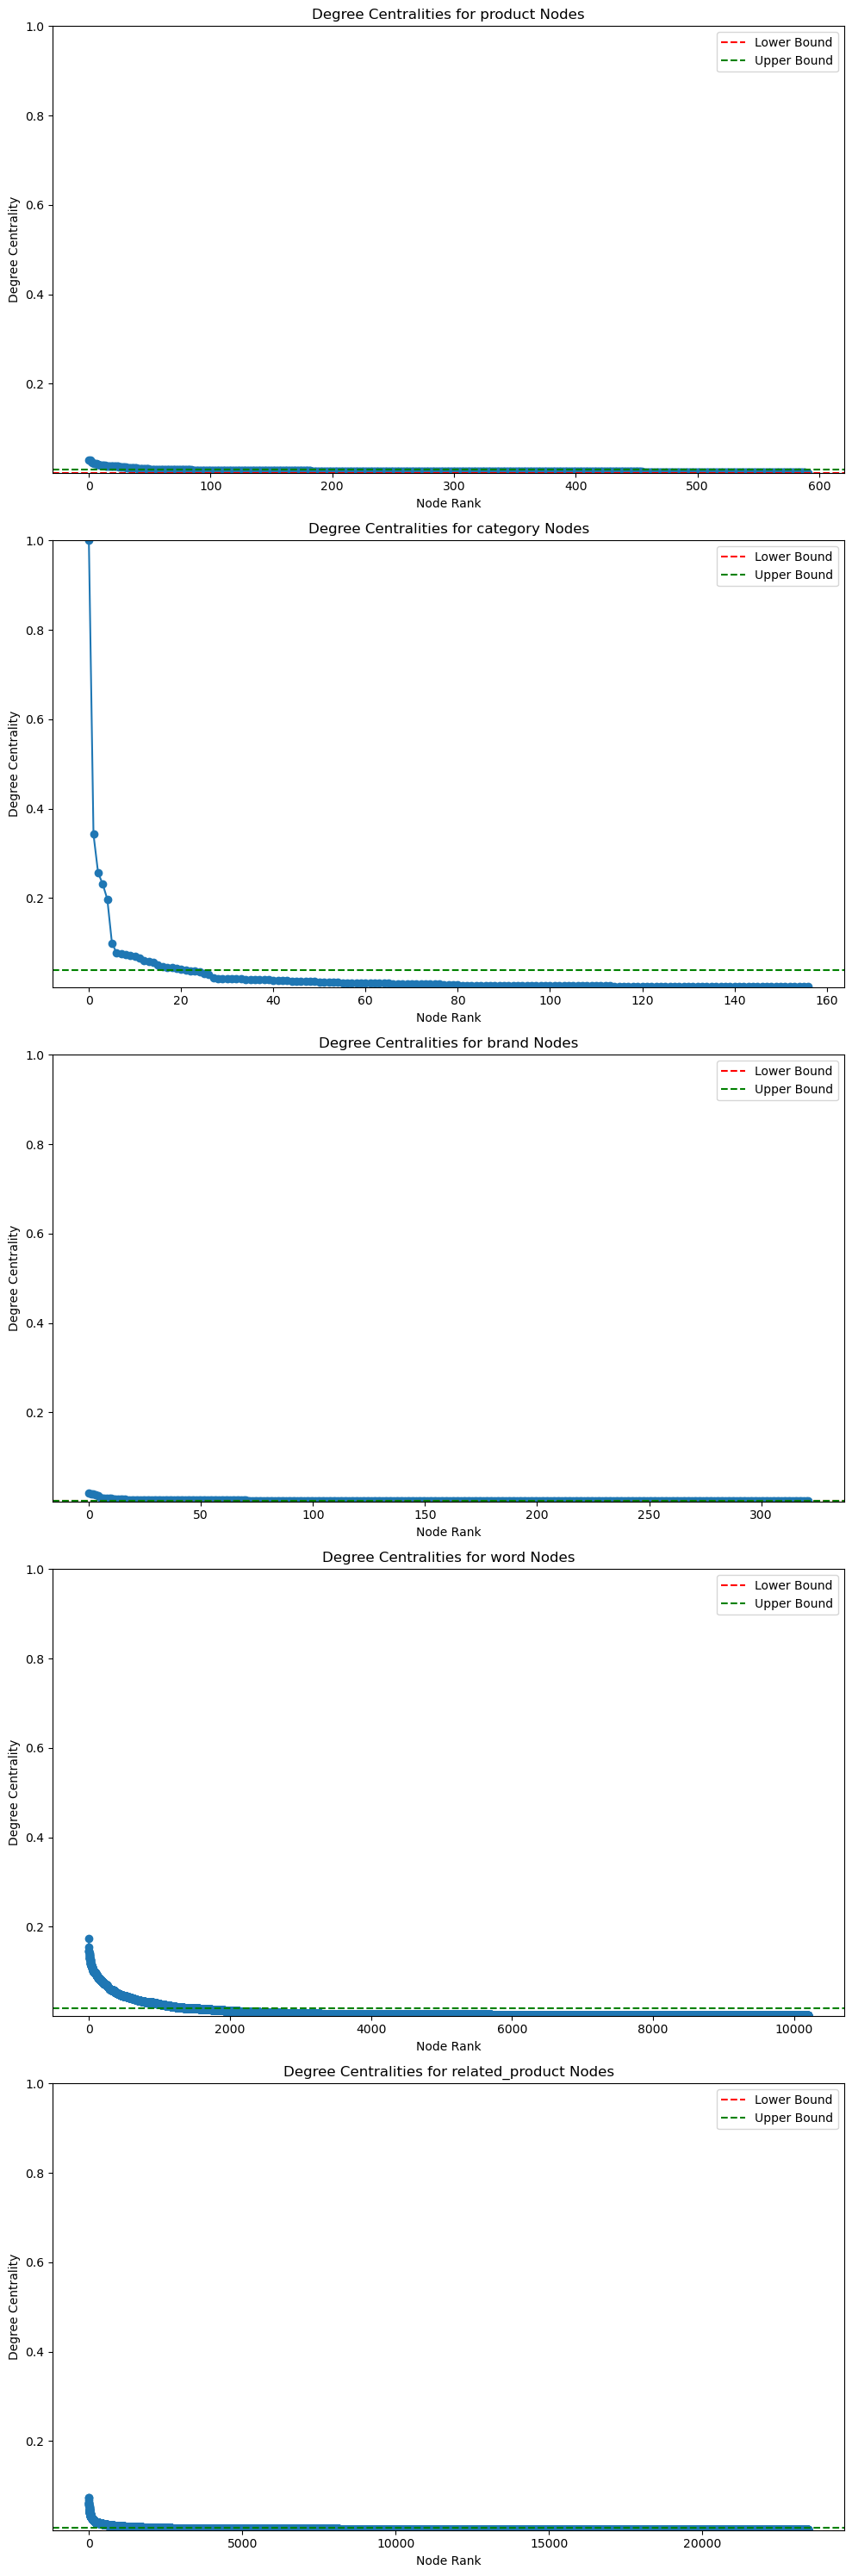

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the degree centralities for each node type
for node_type in node_type_centralities:
    node_type_centralities[node_type].sort(key=lambda x: x[1], reverse=True)

# Function to calculate outlier bounds
def calculate_bounds(data):
    centrality_values = np.array([x[1] for x in data])
    Q1 = np.percentile(centrality_values, 25)
    Q3 = np.percentile(centrality_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Determine the number of subplots needed
num_types = len(node_types)
fig, axs = plt.subplots(num_types, 1, figsize=(10, 6 * num_types), squeeze=False)
axs = axs.flatten()

# Determine global minimum and maximum for consistent y-axis scale
all_centrality_values = [value for centralities in node_type_centralities.values() for _, value in centralities]
global_lower_bound = min(all_centrality_values)
global_upper_bound = max(all_centrality_values)

# Plotting each node type in a separate subplot
for ax, node_type in zip(axs, node_type_centralities):
    centralities = node_type_centralities[node_type]
    if centralities:
        nodes, centrality_values = zip(*centralities)
        ax.plot(range(len(centrality_values)), centrality_values, marker='o')
        # Calculate and plot bounds
        lower_bound, upper_bound = calculate_bounds(centralities)
        ax.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
        ax.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax.set_xlabel('Node Rank')
    ax.set_ylabel('Degree Centrality')
    ax.set_title(f'Degree Centralities for {node_type} Nodes')
    ax.set_ylim(global_lower_bound, global_upper_bound)  # Setting the same y-axis limits
    ax.legend()

plt.tight_layout()
plt.show()


# Modularity Before and after outliers

In [13]:
def calculate_modularity(G):
    # Detect communities
    partition = community_louvain.best_partition(G)
    # Calculate the modularity
    modularity = community_louvain.modularity(partition, G)
    return modularity

In [14]:
def remove_outliers_and_calculate_modularity(G, centrality_dict):
    # Determine the bounds for outliers for each type
    type_bounds = {}
    for node in G.nodes():
        node_type = node.split('_')[0]
        if node_type not in type_bounds:
            type_bounds[node_type] = []
        type_bounds[node_type].append(centrality_dict[node])

    # Calculate IQR for each type and determine outlier bounds
    outlier_bounds = {}
    for node_type, values in type_bounds.items():
        q1 = np.percentile(values, 25)
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_bounds[node_type] = (lower_bound, upper_bound)

    # Remove outliers
    nodes_to_remove = [node for node in G.nodes() if centrality_dict[node] < outlier_bounds[node.split('_')[0]][0] 
                       or centrality_dict[node] > outlier_bounds[node.split('_')[0]][1]]
    G.remove_nodes_from(nodes_to_remove)

    # Calculate modularity after removing outliers
    new_modularity = calculate_modularity(G)
    return new_modularity

# Example usage
# G = nx.generators.erdos_renyi_graph(100, 0.05)
centrality_dict = adjusted_degree_centrality(G)  # Adjust this to your specific normalization as needed
initial_modularity = calculate_modularity(G)
# modularity_after_removal = remove_outliers_and_calculate_modularity(G.copy(), centrality_dict)
modularity_after_removal = remove_outliers_and_calculate_modularity(G, centrality_dict)

print(f"Initial modularity: {initial_modularity}")
print(f"Modularity after removing outliers: {modularity_after_removal}")


Initial modularity: 0.47257544458421374
Modularity after removing outliers: 0.7768588795667021


# Community Size Distribution

In [74]:
def analyze_community_sizes(partition):
    # Calculate the sizes of each community
    sizes = [len(community) for community in partition]
    
    # Compute mean and standard deviation of community sizes
    mean_size = np.mean(sizes)
    std_dev = np.std(sizes)
    
    print(f"Average community size: {mean_size}")
    print(f"Standard deviation of sizes: {std_dev}")
    
    # Define thresholds for large and small communities based on mean and standard deviation
    large_threshold = mean_size + 2 * std_dev
    small_threshold = mean_size - 2 * std_dev
    
    # Identify large and small communities
    large_communities = [community for community in partition if len(community) > large_threshold]
    small_communities = [community for community in partition if len(community) < small_threshold]
    
    # Output the sizes of large and small communities for verification
    print("Large communities (sizes):", [len(community) for community in large_communities])
    print("Small communities (sizes):", [len(community) for community in small_communities])
    print(f"Minimum community size: {min(sizes)}")
    print(f"Maximum community size: {max(sizes)}")

    return large_communities, small_communities


In [75]:
partition = community_louvain.best_partition(G, random_state=42)


# Step 1: Create a dictionary to hold sets of nodes for each community
community_dict = {}

# Step 2: Populate the dictionary with sets of nodes based on community IDs
for node, community_id in partition.items():
# for (node, _), community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = set()
    community_dict[community_id].add(node)

# Step 3: Convert the dictionary to a list of sets
community_list = list(community_dict.values())


analyze_community_sizes(community_list)

Average community size: 1389.08
Standard deviation of sizes: 1005.2582919827123
Large communities (sizes): [4112]
Small communities (sizes): []
Minimum community size: 171
Maximum community size: 4112


([{'word_9219',
   'related_product_14288',
   'related_product_20500',
   'word_4088',
   'related_product_18162',
   'related_product_13996',
   'related_product_14037',
   'related_product_12290',
   'related_product_14022',
   'word_9532',
   'related_product_689',
   'word_7436',
   'related_product_7671',
   'related_product_12209',
   'related_product_23135',
   'related_product_4065',
   'related_product_17963',
   'related_product_1984',
   'related_product_6418',
   'word_3296',
   'word_7676',
   'related_product_22030',
   'related_product_5282',
   'word_4783',
   'related_product_6128',
   'related_product_1826',
   'brand_184',
   'related_product_12964',
   'related_product_2082',
   'related_product_5745',
   'related_product_2008',
   'word_9408',
   'related_product_18265',
   'related_product_441',
   'product_411',
   'word_7463',
   'related_product_18997',
   'related_product_19677',
   'related_product_14052',
   'related_product_18197',
   'word_7385',
   'rela

In [76]:
partition = community_louvain.best_partition(G, resolution=5, random_state=42)


# Step 1: Create a dictionary to hold sets of nodes for each community
community_dict = {}

# Step 2: Populate the dictionary with sets of nodes based on community IDs
for node, community_id in partition.items():
# for (node, _), community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = set()
    community_dict[community_id].add(node)

# Step 3: Convert the dictionary to a list of sets
community_list = list(community_dict.values())


analyze_community_sizes(community_list)

Average community size: 204.2764705882353
Standard deviation of sizes: 145.88299110391728
Large communities (sizes): [515, 624, 767, 535, 720, 661, 555, 559, 516, 512]
Small communities (sizes): []
Minimum community size: 1
Maximum community size: 767


([{'brand_112',
   'brand_166',
   'brand_187',
   'brand_209',
   'brand_220',
   'brand_233',
   'brand_249',
   'category_4',
   'product_115',
   'product_14',
   'product_174',
   'product_198',
   'product_205',
   'product_300',
   'product_333',
   'product_423',
   'product_503',
   'product_79',
   'related_product_10148',
   'related_product_10216',
   'related_product_10224',
   'related_product_10423',
   'related_product_10531',
   'related_product_10729',
   'related_product_11021',
   'related_product_11069',
   'related_product_11071',
   'related_product_11237',
   'related_product_11238',
   'related_product_11240',
   'related_product_11271',
   'related_product_11275',
   'related_product_11291',
   'related_product_11417',
   'related_product_11422',
   'related_product_1169',
   'related_product_11887',
   'related_product_11889',
   'related_product_12053',
   'related_product_12056',
   'related_product_12057',
   'related_product_12058',
   'related_product_12

In [77]:
from collections import Counter
community_sizes = Counter(partition.values())
len(community_sizes)

170

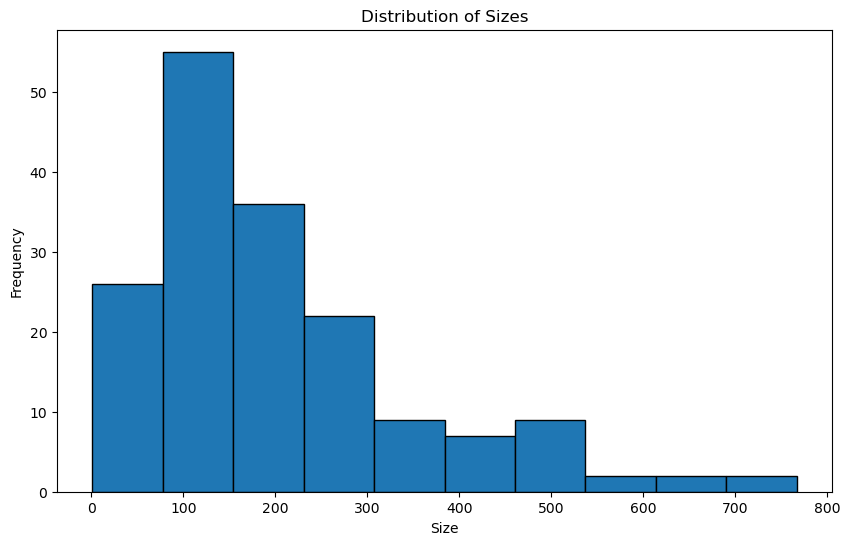

In [78]:
import matplotlib.pyplot as plt

# Data
# sizes = [2660, 173, 2926, 1486, 4010, 1478, 4313, 1688, 2009, 2329, 589, 924, 407, 920, 625, 1696, 320, 1580, 1822, 999, 273, 288, 182, 263, 290, 181, 296]
sizes = list(community_sizes.values())
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=10, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


# Removing Total Ouliers

In [79]:
kg = utils.load_kg('beauty')
analyzer = CommunityAnalyzer(kg.G)
G = analyzer.build_graph(kg.G)

In [80]:
from collections import Counter
partition = community_louvain.best_partition(G,random_state=42)
community_sizes = Counter(partition.values())
len(community_sizes)

25

In [81]:
degree_centrality = adjusted_degree_centrality(G)
degree_centrality

{'product_0': 0.0014354767833601875,
 'category_0': 1.0,
 'category_4': 0.25675675675675674,
 'category_17': 0.0472972972972973,
 'category_18': 0.010135135135135136,
 'category_19': 0.005067567567567568,
 'brand_1': 0.006756756756756757,
 'word_849': 0.011824324324324325,
 'word_1065': 0.07263513513513513,
 'word_1418': 0.07432432432432433,
 'word_1627': 0.013513513513513514,
 'word_1715': 0.02027027027027027,
 'word_2079': 0.060810810810810814,
 'word_2161': 0.005067567567567568,
 'word_2637': 0.013513513513513514,
 'word_2930': 0.0016891891891891893,
 'word_2940': 0.09966216216216216,
 'word_3316': 0.010135135135135136,
 'word_3614': 0.0016891891891891893,
 'word_4268': 0.02027027027027027,
 'word_4421': 0.07939189189189189,
 'word_4837': 0.015202702702702704,
 'word_4852': 0.06756756756756757,
 'word_4866': 0.030405405405405407,
 'word_5320': 0.015202702702702704,
 'word_5653': 0.005067567567567568,
 'word_8247': 0.08108108108108109,
 'word_8524': 0.0033783783783783786,
 'word_9059

In [82]:
import networkx as nx
import numpy as np

def remove_centrality_outliers(G, centrality_dict, method='std_dev', num_std_dev=2, top_n=10):
    """
    Remove outliers from the graph G based on centrality values using specified methods and return the removed nodes.

    Parameters:
    - G: A NetworkX graph.
    - centrality_dict: Dictionary of centrality values of the nodes in G.
    - method: Method to use for outlier removal ('std_dev', 'top_n', 'iqr').
    - num_std_dev: Number of standard deviations to use as the cutoff (used if method='std_dev').
    - top_n: Number of top highest centrality nodes to remove (used if method='top_n').

    Returns:
    - A new graph with outliers removed.
    - A dictionary of removed nodes and their centrality values.
    """
    centrality_values = list(centrality_dict.values())
    removed_nodes = {}

    if method == 'std_dev':
        mean_centrality = np.mean(centrality_values)
        std_dev_centrality = np.std(centrality_values)
        lower_bound = mean_centrality - num_std_dev * std_dev_centrality
        upper_bound = mean_centrality + num_std_dev * std_dev_centrality
        filter_func = lambda x: lower_bound <= x <= upper_bound
    elif method == 'top_n':
        sorted_centralities = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
        cutoff_value = sorted_centralities[min(top_n - 1, len(sorted_centralities) - 1)][1]
        filter_func = lambda x: x <= cutoff_value
        # Collect top_n outliers
        for node, centrality in sorted_centralities[:top_n]:
            removed_nodes[node] = centrality
    elif method == 'iqr':
        Q1 = np.percentile(centrality_values, 25)
        Q3 = np.percentile(centrality_values, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filter_func = lambda x: lower_bound <= x <= upper_bound
    else:
        raise ValueError("Invalid method specified. Choose 'std_dev', 'top_n', or 'iqr'.")

    # Create a new graph without outliers
    G_new = nx.Graph()
    for node, centrality in centrality_dict.items():
        if filter_func(centrality):
            G_new.add_node(node)
        else:
            if method != 'top_n':  # For top_n, outliers are already collected
                removed_nodes[node] = centrality
    
    # Add edges for the remaining nodes
    G_new.add_edges_from((u, v) for u, v in G.edges() if u in G_new and v in G_new)

    return G_new, removed_nodes

In [83]:
G_clean_std, removed_std = remove_centrality_outliers(G, centrality_dict, method='std_dev')
G_clean_top, removed_top = remove_centrality_outliers(G, centrality_dict, method='top_n', top_n=1)
G_clean_iqr, removed_iqr = remove_centrality_outliers(G, centrality_dict, method='iqr')

In [84]:
print(len(G_clean_top))
print(len(G))

34727
34727


In [85]:
partition = community_louvain.best_partition(G_clean_top,random_state=42)
community_sizes = Counter(partition.values())
len(community_sizes)

25

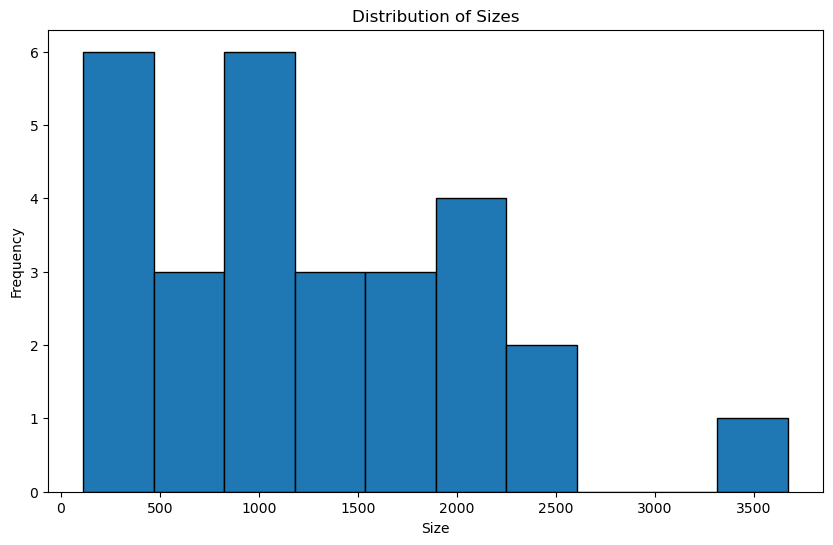

In [59]:
import matplotlib.pyplot as plt

# Data
# sizes = [2660, 173, 2926, 1486, 4010, 1478, 4313, 1688, 2009, 2329, 589, 924, 407, 920, 625, 1696, 320, 1580, 1822, 999, 273, 288, 182, 263, 290, 181, 296]
sizes = list(community_sizes.values())
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=10, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


In [60]:
# Step 1: Create a dictionary to hold sets of nodes for each community
community_dict = {}

# Step 2: Populate the dictionary with sets of nodes based on community IDs
for node, community_id in partition.items():
# for (node, _), community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = set()
    community_dict[community_id].add(node)

# Step 3: Convert the dictionary to a list of sets
community_list = list(community_dict.values())


analyze_community_sizes(community_list)

Average community size: 1233.607142857143
Standard deviation of sizes: 849.7103850844759
Large communities (sizes): [3672]
Small communities (sizes): []


([{'related_product_14288',
   'related_product_20500',
   'related_product_17724',
   'word_4088',
   'related_product_13996',
   'related_product_14037',
   'related_product_14022',
   'word_7436',
   'related_product_7671',
   'related_product_12209',
   'related_product_23135',
   'related_product_4065',
   'related_product_1984',
   'related_product_6418',
   'word_7676',
   'related_product_5282',
   'word_1557',
   'word_4783',
   'related_product_6128',
   'related_product_1741',
   'related_product_1826',
   'brand_184',
   'related_product_12964',
   'related_product_2082',
   'related_product_5745',
   'related_product_2008',
   'word_9408',
   'related_product_18265',
   'related_product_441',
   'product_411',
   'word_7463',
   'related_product_19677',
   'related_product_14052',
   'related_product_18197',
   'word_264',
   'word_7385',
   'related_product_17473',
   'related_product_8630',
   'word_5257',
   'related_product_19303',
   'brand_28',
   'related_product_12

In [61]:
removed_nodes

{'category_0': 1.0,
 'category_4': 0.25675675675675674,
 'category_17': 0.0472972972972973,
 'word_849': 0.011824324324324325,
 'word_1065': 0.07263513513513513,
 'word_1418': 0.07432432432432433,
 'word_1627': 0.013513513513513514,
 'word_1715': 0.02027027027027027,
 'word_2079': 0.060810810810810814,
 'word_2637': 0.013513513513513514,
 'word_2940': 0.09966216216216216,
 'word_4268': 0.02027027027027027,
 'word_4421': 0.07939189189189189,
 'word_4837': 0.015202702702702704,
 'word_4852': 0.06756756756756757,
 'word_4866': 0.030405405405405407,
 'word_5320': 0.015202702702702704,
 'word_8247': 0.08108108108108109,
 'word_9059': 0.02027027027027027,
 'word_10123': 0.02702702702702703,
 'word_10336': 0.07601351351351351,
 'word_10337': 0.04560810810810811,
 'category_14': 0.34290540540540543,
 'category_23': 0.07432432432432433,
 'category_24': 0.06925675675675676,
 'category_28': 0.060810810810810814,
 'word_381': 0.03885135135135135,
 'word_680': 0.04391891891891892,
 'word_905': 0.08

In [64]:
calculate_modularity(G_clean_top)

0.5221378641768011

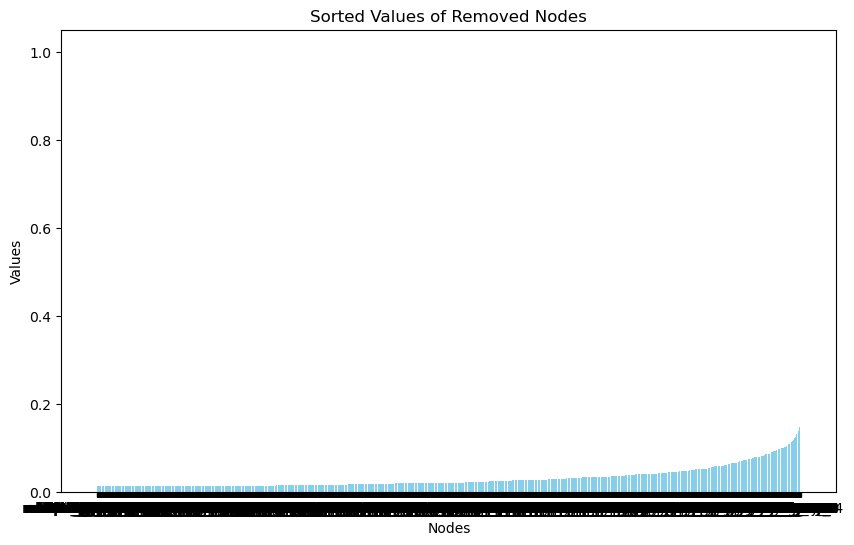

In [48]:
# Sort the dictionary by values
sorted_removed_nodes = dict(sorted(removed_nodes.items(), key=lambda x: x[1]))

# Extract sorted keys and values
labels = list(sorted_removed_nodes.keys())
values = list(sorted_removed_nodes.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')

# Add titles and labels
plt.title('Sorted Values of Removed Nodes')
plt.xlabel('Nodes')
plt.ylabel('Values')

# Show the plot
plt.show()

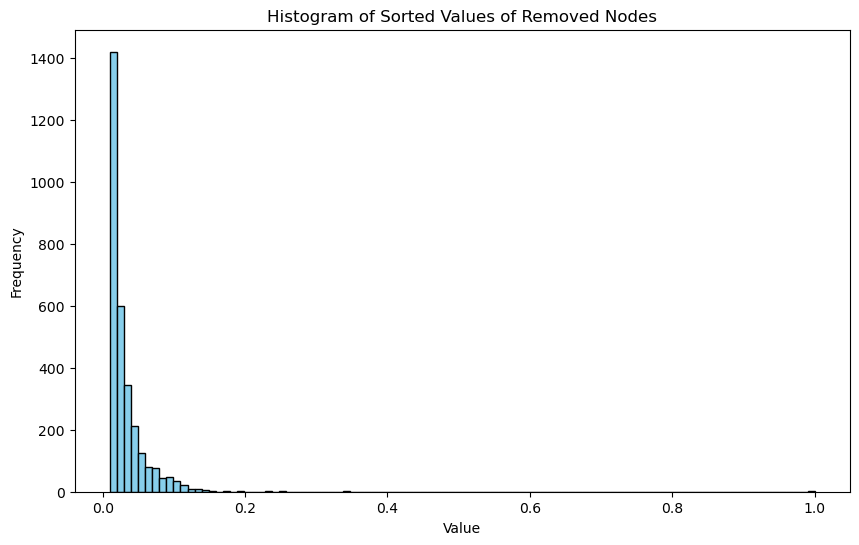

In [53]:
# Sort the dictionary by values
sorted_removed_nodes = dict(sorted(removed_nodes.items(), key=lambda x: x[1]))

# Extract sorted values
values = list(sorted_removed_nodes.values())

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=0, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Sorted Values of Removed Nodes')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [86]:
def analyze_graph_and_communities(G, centrality_dict, method='top_n', top_n=10):
    """
    Cleans the graph based on specified outlier removal method, analyzes community structures,
    and plots the distribution of community sizes and removed node centrality values.
    
    Parameters:
    - G: A NetworkX graph.
    - centrality_dict: Dictionary of centrality values of the nodes in G.
    - method: Method for outlier removal ('std_dev', 'top_n', 'iqr').
    - top_n: Number of top highest centrality nodes to remove if method='top_n'.
    """
    # Remove outliers based on centrality and get the cleaned graph and removed nodes
    G_clean, removed_nodes = remove_centrality_outliers(G, centrality_dict, method=method, top_n=top_n)

    print("Size of the cleaned graph:", len(G_clean))
    print("Original graph size:", len(G))

    print("\nThe initial Modularity ")

    # Community detection using Louvain method
    partition = community_louvain.best_partition(G_clean, random_state=42)
    community_sizes = Counter(partition.values())

    # Plot the distribution of community sizes
    plt.figure(figsize=(10, 6))
    plt.hist(list(community_sizes.values()), bins=10, edgecolor='black')
    plt.title('Distribution of Community Sizes')
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.show()

    # Organize nodes by community
    community_dict = {}
    for node, community_id in partition.items():
        if community_id not in community_dict:
            community_dict[community_id] = set()
        community_dict[community_id].add(node)
    community_list = list(community_dict.values())

    # Analyze community sizes
    analyze_community_sizes(community_list)  # Assuming a function 'analyze_community_sizes' exists

    # Sort removed nodes by centrality values
    sorted_removed_nodes = dict(sorted(removed_nodes.items(), key=lambda item: item[1], reverse=True))

    # Plotting histogram of centrality values of removed nodes
    plt.figure(figsize=(10, 6))
    plt.hist(list(sorted_removed_nodes.values()), bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Sorted Values of Removed Nodes')
    plt.xlabel('Centrality Value')
    plt.ylabel('Frequency')
    plt.show()

Size of the cleaned graph: 33714
Original graph size: 34727


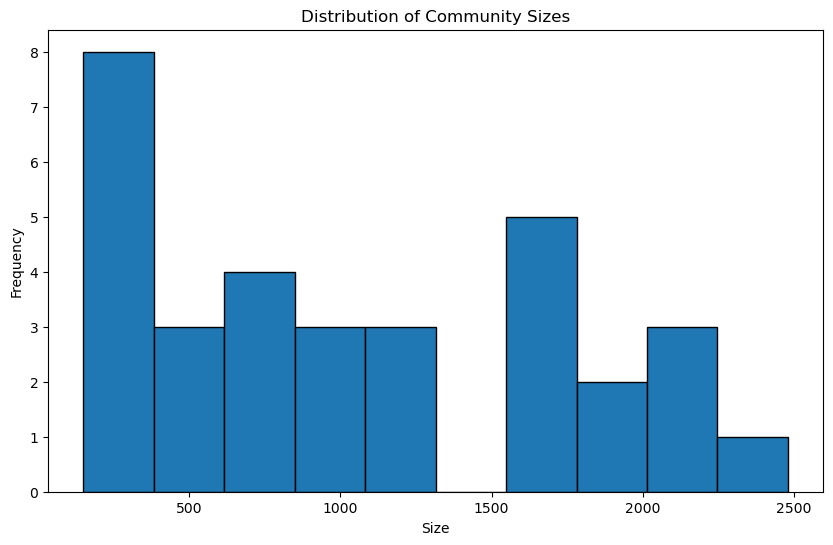

Average community size: 1053.5625
Standard deviation of sizes: 723.4726125388231
Large communities (sizes): []
Small communities (sizes): []
Minimum community size: 149
Maximum community size: 2481


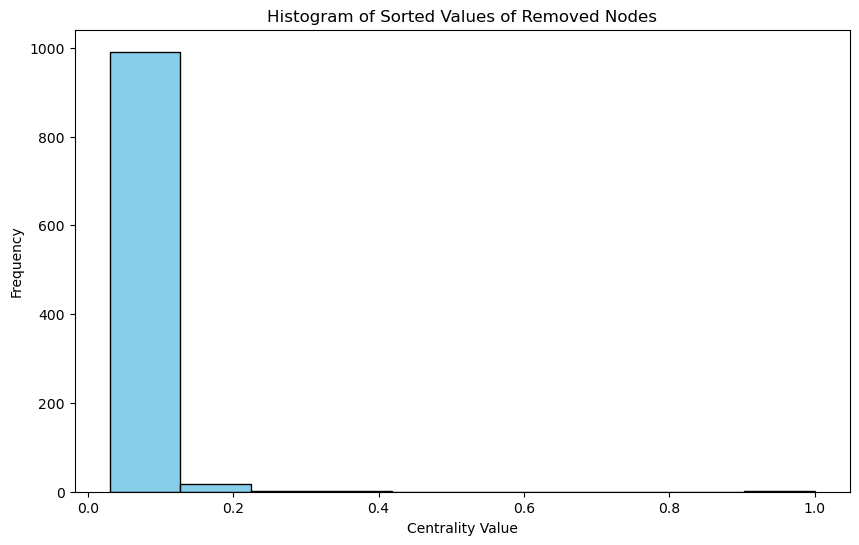

In [87]:
analyze_graph_and_communities(G, degree_centrality, method='std_dev')

# Narrative

## What happens

first layer of entities

In [6]:
def report_related_entities_statistics(kg, entities):
    """
    Generates a report on the statistics of the related entities for a given product.
    """
    print("Related Entities Statistics Report:\n")

    # Categories
    num_related_categories = len(entities["category"])
    num_kg_categories = len(kg.G["category"])
    print(f"Number of related categories: {num_related_categories}")
    print(f"Number of categories in the knowledge graph: {num_kg_categories}")
    print(
        f"Percentage of related categories: {num_related_categories / num_kg_categories * 100:.2f}%\n"
    )

    # Brands
    num_related_brands = len(entities["brand"])
    num_kg_brands = len(kg.G["brand"])
    print(f"Number of related brands: {num_related_brands}")
    print(f"Number of brands in the knowledge graph: {num_kg_brands}")
    print(
        f"Percentage of related brands: {num_related_brands / num_kg_brands * 100:.2f}%\n"
    )

    # Words
    num_related_words = len(entities["word"])
    num_kg_words = len(kg.G["word"])
    print(f"Number of related words: {num_related_words}")
    print(f"Number of words in the knowledge graph: {num_kg_words}")
    print(
        f"Percentage of related words: {num_related_words / num_kg_words * 100:.2f}%\n"
    )

    # Related Products
    num_related_products = len(entities["related_product"])
    num_kg_related_products = len(kg.G["related_product"])
    print(f"Number of related products: {num_related_products}")
    print(f"Number of products in the knowledge graph: {num_kg_related_products}")
    print(
        f"Percentage of related products: {num_related_products / num_kg_related_products * 100:.2f}%\n"
    )

In [7]:
def analyze_product_relationships(kg, product_id):
    entities = {'category': set(), 'brand': set(), 'word': set(), 'related_product': set()}
    initial_counts = {'category': 0, 'brand': 0, 'word': 0, 'related_product': 0}
    # detailed_changes = {key: {'category': set(), 'brand': set(), 'word': set(), 'related_product': set()} for key in ['category', 'brand', 'word', 'related_product']}
    detailed_changes = {key: {'category': {'connected':set(), 'new_attributes':set()}, 'brand': {'connected':set(), 'new_attributes':set()},\
                               'word': {'connected':set(), 'new_attributes':set()}, 'related_product': {'connected':set(), 'new_attributes':set()}} for key in ['category', 'brand', 'word', 'related_product']}
    related_products_count = {key: 0 for key in ['category', 'brand', 'word', 'related_product']}


    def update_entities(kg, related_products, entities, context):
        updated_entities = update_entities_from_related_products(kg, related_products)
        for key in ['category', 'brand', 'word', 'related_product']:
            before_update = set(entities[key])  # Copy the set here
            entities[key].update(updated_entities[key])
            detailed_changes[context][key]['connected'].update(updated_entities[key])
            if entities[key] != before_update:
                detailed_changes[context][key]['new_attributes'].update(entities[key] - before_update)

    # Process categories
    category_ids = kg['product'].get(product_id, {}).get('belongs_to', [])
    initial_counts['category'] = len(category_ids)
    for category_id in category_ids:
        related_products = kg['category'].get(category_id, {}).get('rev_belongs_to', [])
        related_products_count['category'] += len(related_products)
        update_entities(kg, related_products, entities, 'category')

    # Process brands
    brand_ids = kg['product'].get(product_id, {}).get('produced_by', [])
    initial_counts['brand'] = len(brand_ids)
    for brand_id in brand_ids:
        related_products = kg['brand'].get(brand_id, {}).get('rev_produced_by', [])
        related_products_count['brand'] += len(related_products)
        update_entities(kg, related_products, entities, 'brand')

    # Process words
    word_ids = kg['product'].get(product_id, {}).get('described_by', [])
    initial_counts['word'] = len(word_ids)
    for word_id in word_ids:
        related_products = kg['word'].get(word_id, {}).get('rev_described_by', [])
        related_products_count['word'] += len(related_products)
        update_entities(kg, related_products, entities, 'word')

    # Process related products directly related to the given product
    related_products_ids = kg['product'].get(product_id, {}).get('also_bought', []) +\
                       kg['product'].get(product_id, {}).get('also_viewed', []) +\
                       kg['product'].get(product_id, {}).get('bought_together', [])
    initial_counts['related_product'] = len(related_products)
    for related_product_id in related_products_ids:
        related_products = kg['related_product'].get(related_product_id, {}).get('rev_also_bought', []) +\
                            kg['related_product'].get(related_product_id, {}).get('rev_also_viewed', []) +\
                            kg['related_product'].get(related_product_id, {}).get('rev_bought_together', [])
        related_products_count['related_product'] += len(related_products)
        update_entities(kg, related_products, entities, 'related_product')
        

    

    # # Generate detailed report
    # total_entities = {k: len(v) for k, v in entities.items()}
    # report = f"Report for product with ID {product_id}:\n"
    # for key in ['category', 'brand', 'word', 'related_product']:
    #     added_totals = {k: len(detailed_changes[key][k]) for k in ['category', 'brand', 'word', 'related_product']}
    #     report += f"Initially connected {key}: {initial_counts[key]}, total now connected to {total_entities[key]} products.\n"
    #     report += f"            Added during analysis: {added_totals[key]} {key}\n"
    #     for subkey in ['category', 'brand', 'word', 'related_product']:
    #         if subkey != key:
    #             report += f"                                    {added_totals[subkey]} {subkey}\n"

    # Generate detailed report
    total_entities = {k: len(v) for k, v in entities.items()}
    report = f"Report for product with ID {product_id}:\n"
    for key in ['category', 'brand', 'word', 'related_product']:
        report += f"Initially connected {key}: {initial_counts[key]}, total now connected to {total_entities[key]} products.\n"
        for subkey in ['category', 'brand', 'word', 'related_product']:
            connected = len(detailed_changes[key][subkey]['connected'])
            new_attributes = len(detailed_changes[key][subkey]['new_attributes'])
            # report += f"            number of connected {subkey}: {connected} introduced new,                         {new_attributes} new attributes added\n"
            report += f"            number of connected {subkey:<15}: {connected:<18} introduced, {new_attributes:<6} new attributes added\n"

    return report, entities

def update_entities_from_related_products(kg, related_products):
    entities = {
        'category': set(),
        'brand': set(),
        'word': set(),
        'related_product': set()
    }

    for related_product_id in related_products:
        related_product_info = kg['product'].get(related_product_id, {})
        entities['category'].update(related_product_info.get('belongs_to', []))
        entities['brand'].update(related_product_info.get('produced_by', []))
        entities['word'].update(related_product_info.get('described_by', []))
        entities['related_product'].update(
            related_product_info.get('also_bought', []) +
            related_product_info.get('also_viewed', []) +
            related_product_info.get('bought_together', [])
        )

    return entities


In [8]:
report, entities = analyze_product_relationships(kg.G, 46)

In [9]:
print(report)

Report for product with ID 46:
Initially connected category: 4, total now connected to 157 products.
            number of connected category       : 157                introduced, 157    new attributes added
            number of connected brand          : 322                introduced, 322    new attributes added
            number of connected word           : 10203              introduced, 10203  new attributes added
            number of connected related_product: 23453              introduced, 23453  new attributes added
Initially connected brand: 1, total now connected to 322 products.
            number of connected category       : 4                  introduced, 0      new attributes added
            number of connected brand          : 1                  introduced, 0      new attributes added
            number of connected word           : 39                 introduced, 0      new attributes added
            number of connected related_product: 95                 introduc

In [10]:
report_related_entities_statistics(kg, entities)

Related Entities Statistics Report:

Number of related categories: 157
Number of categories in the knowledge graph: 157
Percentage of related categories: 100.00%

Number of related brands: 322
Number of brands in the knowledge graph: 322
Percentage of related brands: 100.00%

Number of related words: 10203
Number of words in the knowledge graph: 10586
Percentage of related words: 96.38%

Number of related products: 23453
Number of products in the knowledge graph: 23453
Percentage of related products: 100.00%



---

## Why is it so

In [11]:
import networkx as nx

def adjusted_degree_centrality(G, number_of_products=592):
    # Calculate raw degree centrality for all nodes
    raw_centrality = G.degree()

    # Count the total number of nodes except 'product' type nodes
    non_product_nodes = sum(1 for n in G.nodes if not n.startswith('product'))
    
    # Initialize the centrality dictionary
    centrality = {}

    # Apply different normalization based on node type
    for node, degree in raw_centrality:
        if node.startswith('product'):
            # Normalize by the number of non-product nodes
            centrality[node] = degree / non_product_nodes
        else:
            # Normalize by the number of products
            centrality[node] = degree / number_of_products

    return centrality

In [12]:
degree_centrality = adjusted_degree_centrality(G)

In [13]:
node_types = set()
node_type_centralities = {}

for node, centrality in degree_centrality.items():
    node_type, node_id = node.rsplit('_', 1)
    node_types.add(node_type)
    if node_type not in node_type_centralities:
        node_type_centralities[node_type] = []
    node_type_centralities[node_type].append((node, centrality))

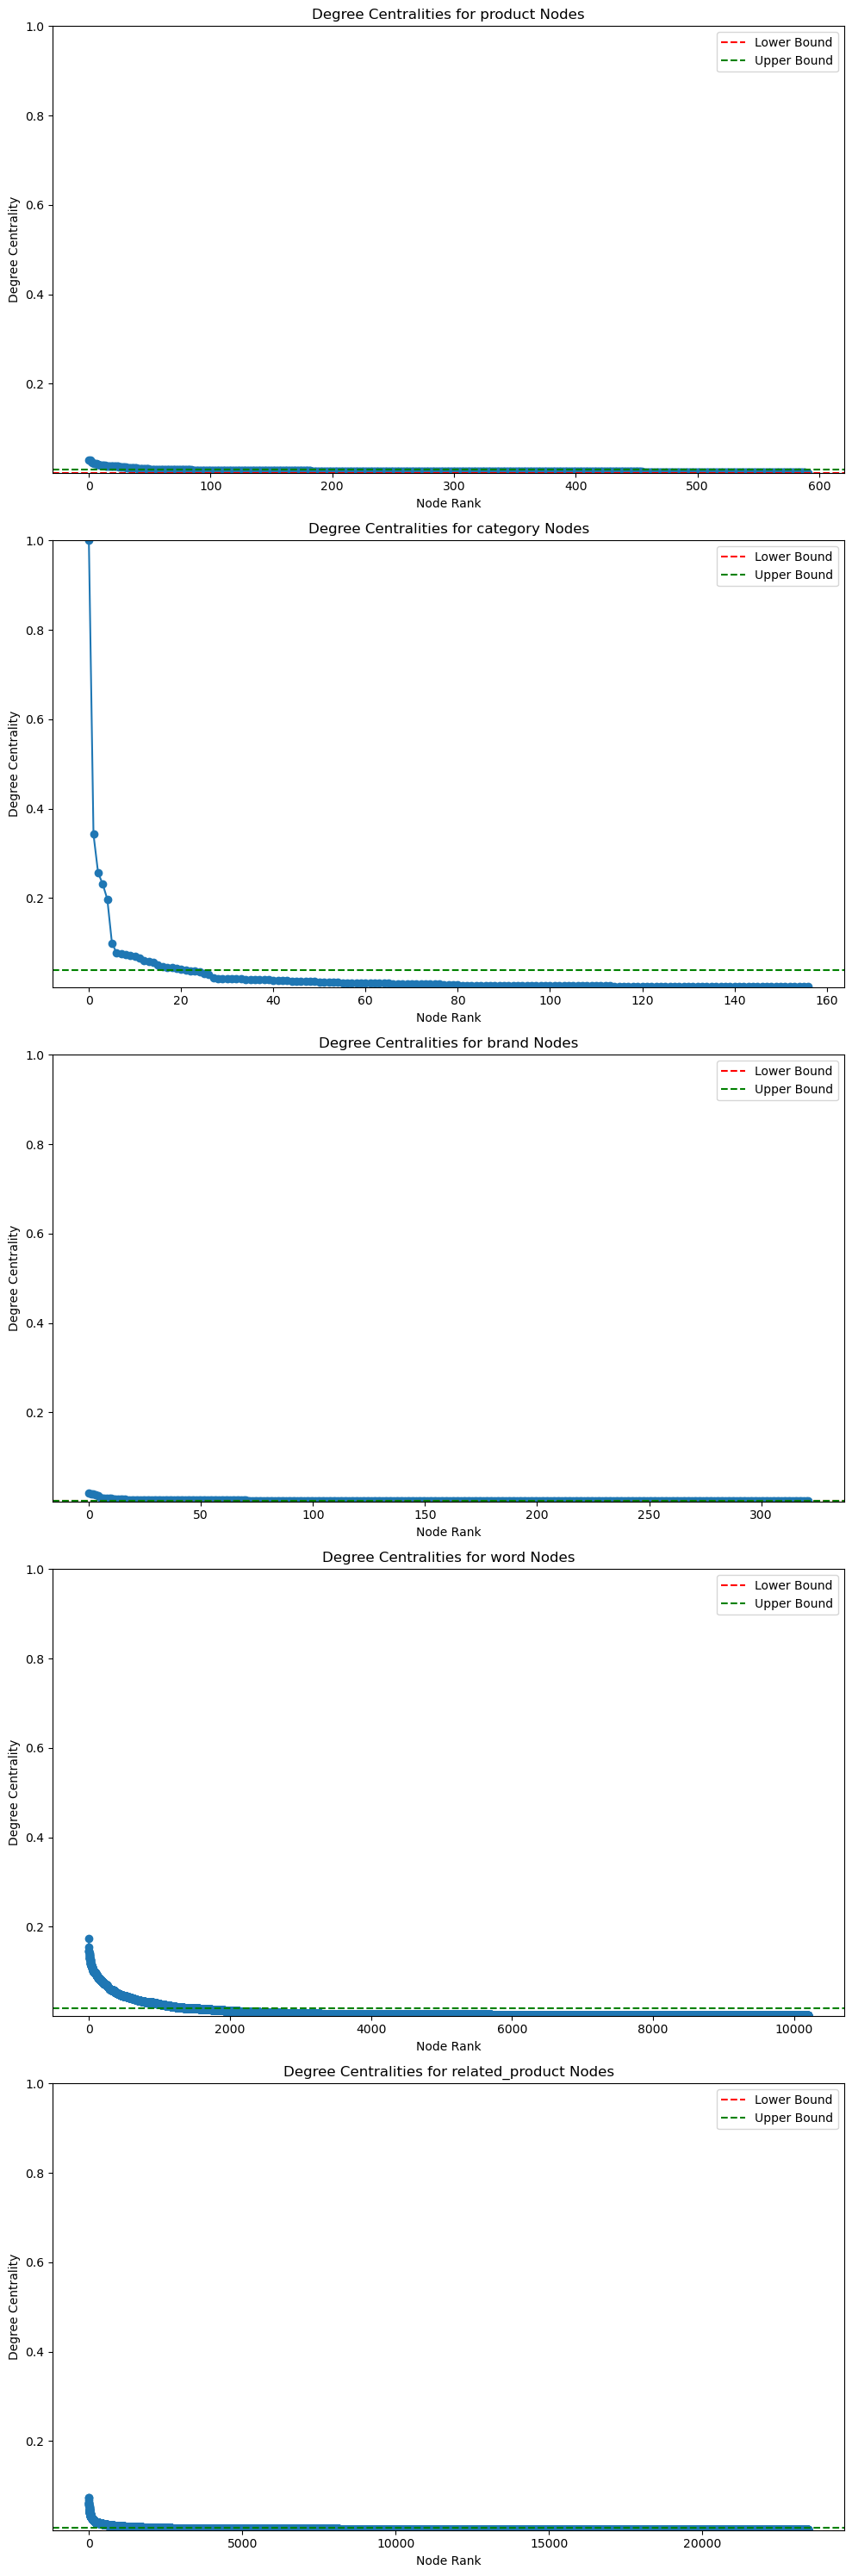

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the degree centralities for each node type
for node_type in node_type_centralities:
    node_type_centralities[node_type].sort(key=lambda x: x[1], reverse=True)

# Function to calculate outlier bounds
def calculate_bounds(data):
    centrality_values = np.array([x[1] for x in data])
    Q1 = np.percentile(centrality_values, 25)
    Q3 = np.percentile(centrality_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Determine the number of subplots needed
num_types = len(node_types)
fig, axs = plt.subplots(num_types, 1, figsize=(10, 6 * num_types), squeeze=False)
axs = axs.flatten()

# Determine global minimum and maximum for consistent y-axis scale
all_centrality_values = [value for centralities in node_type_centralities.values() for _, value in centralities]
global_lower_bound = min(all_centrality_values)
global_upper_bound = max(all_centrality_values)

# Plotting each node type in a separate subplot
for ax, node_type in zip(axs, node_type_centralities):
    centralities = node_type_centralities[node_type]
    if centralities:
        nodes, centrality_values = zip(*centralities)
        ax.plot(range(len(centrality_values)), centrality_values, marker='o')
        # Calculate and plot bounds
        lower_bound, upper_bound = calculate_bounds(centralities)
        ax.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
        ax.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax.set_xlabel('Node Rank')
    ax.set_ylabel('Degree Centrality')
    ax.set_title(f'Degree Centralities for {node_type} Nodes')
    ax.set_ylim(global_lower_bound, global_upper_bound)  # Setting the same y-axis limits
    ax.legend()

plt.tight_layout()
plt.show()


In [15]:
import networkx as nx
import numpy as np

def calculate_outlier_bounds(centrality_values, method='std_dev', num_std_dev=2, top_n=10, top_percentile=95):
    """
    Calculate the bounds or identify outliers based on centrality values using specified methods.

    Parameters:
    - centrality_values: List of centrality values.
    - method: Method to use for outlier calculation ('std_dev', 'top_n', 'iqr', 'percentile').
    - num_std_dev: Number of standard deviations to use as the cutoff (used if method='std_dev').
    - top_n: Number of top highest centrality nodes to identify (used if method='top_n').
    - top_percentile: Percentile for identifying top centrality nodes (used if method='percentile').

    Returns:
    - A tuple (lower_bound, upper_bound) for 'std_dev' and 'iqr' methods.
    - A list of top_n outliers for 'top_n' method.
    - A list of outliers for 'percentile' method.
    """
    if method == 'std_dev':
        mean_centrality = np.mean(centrality_values)
        std_dev_centrality = np.std(centrality_values)
        lower_bound = mean_centrality - num_std_dev * std_dev_centrality
        upper_bound = mean_centrality + num_std_dev * std_dev_centrality
        return lower_bound, upper_bound
    elif method == 'top_n':
        sorted_centralities = sorted(centrality_values, reverse=True)
        return sorted_centralities[:top_n]
    elif method == 'iqr':
        Q1 = np.percentile(centrality_values, 25)
        Q3 = np.percentile(centrality_values, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound
    elif method == 'percentile':
        threshold = np.percentile(centrality_values, top_percentile)
        return [value for value in centrality_values if value >= threshold]
    else:
        raise ValueError("Invalid method specified. Choose 'std_dev', 'top_n', 'iqr', or 'percentile'.")

def identify_outliers(centrality_dict, method='std_dev', num_std_dev=2, top_n=10, top_percentile=95):
    """
    Identify outliers from the centrality values using specified methods.

    Parameters:
    - centrality_dict: Dictionary of centrality values of the nodes in a graph.
    - method: Method to use for outlier identification ('std_dev', 'top_n', 'iqr', 'percentile').
    - num_std_dev: Number of standard deviations to use as the cutoff (used if method='std_dev').
    - top_n: Number of top highest centrality nodes to identify as outliers (used if method='top_n').
    - top_percentile: Percentile for identifying top centrality nodes (used if method='percentile').

    Returns:
    - A dictionary of outlier nodes and their centrality values.
    - A tuple (lower_bound, upper_bound) or list of top_n outliers or percentile outliers based on the method.
    """
    centrality_values = list(centrality_dict.values())

    if method in ['std_dev', 'iqr', 'percentile']:
        bounds_or_outliers = calculate_outlier_bounds(centrality_values, method, num_std_dev, top_n, top_percentile)
        if method == 'percentile':
            outliers = {node: centrality for node, centrality in centrality_dict.items() if centrality >= bounds_or_outliers[0]}
            return outliers, bounds_or_outliers
        else:
            lower_bound, upper_bound = bounds_or_outliers
            outliers = {node: centrality for node, centrality in centrality_dict.items() if centrality < lower_bound or centrality > upper_bound}
            return outliers, (lower_bound, upper_bound)
    elif method == 'top_n':
        top_n_outliers = calculate_outlier_bounds(centrality_values, method, num_std_dev, top_n)
        outliers = {node: centrality for node, centrality in sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)[:top_n]}
        return outliers, top_n_outliers
    else:
        raise ValueError("Invalid method specified. Choose 'std_dev', 'top_n', 'iqr', or 'percentile'.")


In [16]:
outliers, (lower_bound, upper_bound) = identify_outliers(degree_centrality, method='std_dev', num_std_dev=2, top_n=10)

In [17]:
outliers, bounds_or_outliers = identify_outliers(degree_centrality, method='percentile',top_percentile=95)

In [18]:
upper_bound

0.029563988722272484

In [19]:
outliers, top_n_values = identify_outliers(degree_centrality, method='top_n', top_n=80)

In [20]:
outliers

{'category_0': 1.0,
 'category_14': 0.34290540540540543,
 'category_4': 0.25675675675675674,
 'category_2': 0.23141891891891891,
 'category_1': 0.19763513513513514,
 'word_6816': 0.17398648648648649,
 'word_4639': 0.15371621621621623,
 'word_1778': 0.14695945945945946,
 'word_6880': 0.14527027027027026,
 'word_1814': 0.14527027027027026,
 'word_9314': 0.14020270270270271,
 'word_3518': 0.13851351351351351,
 'word_9541': 0.13682432432432431,
 'word_6812': 0.13513513513513514,
 'word_2105': 0.13513513513513514,
 'word_1108': 0.13513513513513514,
 'word_5871': 0.13175675675675674,
 'word_3703': 0.13175675675675674,
 'word_3557': 0.13006756756756757,
 'word_9432': 0.13006756756756757,
 'word_2544': 0.13006756756756757,
 'word_7447': 0.12837837837837837,
 'word_6718': 0.1266891891891892,
 'word_1116': 0.125,
 'word_3155': 0.125,
 'word_7678': 0.125,
 'word_3744': 0.12162162162162163,
 'word_8705': 0.12162162162162163,
 'word_8557': 0.12162162162162163,
 'word_2552': 0.11824324324324324,
 'w

## As solution

In [21]:
def calculate_modularity(G):
    # Detect communities
    partition = community_louvain.best_partition(G, random_state=42)
    # Calculate the modularity
    modularity = community_louvain.modularity(partition, G)
    return modularity

def compare_modularity(G, cleaned_G):
    old_modularity = calculate_modularity(G)
    new_modularity = calculate_modularity(cleaned_G)
    print()
    print(f'The modularity of the original Graph: {old_modularity}')
    print(f'The modularity of the cleaned Graph: {new_modularity}')
    print()

In [22]:
import networkx as nx
import numpy as np

def remove_centrality_outliers(G, centrality_dict, method='std_dev', num_std_dev=2, top_n=10, top_percentile=95):
    """
    Remove outliers from the graph G based on centrality values using specified methods and return the removed nodes.

    Parameters:
    - G: A NetworkX graph.
    - centrality_dict: Dictionary of centrality values of the nodes in G.
    - method: Method to use for outlier removal ('std_dev', 'top_n', 'iqr', 'percentile').
    - num_std_dev: Number of standard deviations to use as the cutoff (used if method='std_dev').
    - top_n: Number of top highest centrality nodes to remove (used if method='top_n').
    - top_percentile: Percentile threshold to use for outlier removal (used if method='percentile').

    Returns:
    - A new graph with outliers removed.
    - A dictionary of removed nodes and their centrality values.
    """
    centrality_values = list(centrality_dict.values())
    removed_nodes = {}

    if method == 'std_dev':
        mean_centrality = np.mean(centrality_values)
        std_dev_centrality = np.std(centrality_values)
        lower_bound = mean_centrality - num_std_dev * std_dev_centrality
        upper_bound = mean_centrality + num_std_dev * std_dev_centrality
        filter_func = lambda x: lower_bound <= x <= upper_bound
    elif method == 'top_n':
        sorted_centralities = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
        cutoff_value = sorted_centralities[min(top_n - 1, len(sorted_centralities) - 1)][1]
        filter_func = lambda x: x <= cutoff_value
        # Collect top_n outliers
        for node, centrality in sorted_centralities[:top_n]:
            removed_nodes[node] = centrality
    elif method == 'iqr':
        Q1 = np.percentile(centrality_values, 25)
        Q3 = np.percentile(centrality_values, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filter_func = lambda x: lower_bound <= x <= upper_bound
    elif method == 'percentile':
        threshold = np.percentile(centrality_values, top_percentile)
        filter_func = lambda x: x < threshold
        # Collect percentile-based outliers
        for node, centrality in centrality_dict.items():
            if centrality >= threshold:
                removed_nodes[node] = centrality
    else:
        raise ValueError("Invalid method specified. Choose 'std_dev', 'top_n', 'iqr', or 'percentile'.")

    # Create a new graph without outliers
    G_new = nx.Graph()
    for node, centrality in centrality_dict.items():
        if filter_func(centrality):
            G_new.add_node(node)
    
    # Add edges for the remaining nodes
    G_new.add_edges_from((u, v) for u, v in G.edges() if u in G_new and v in G_new)

    return G_new, removed_nodes


In [23]:
def analyze_community_sizes(partition):
    # Calculate the sizes of each community
    sizes = [len(community) for community in partition]
    
    # Compute mean and standard deviation of community sizes
    mean_size = np.mean(sizes)
    std_dev = np.std(sizes)
    
    print(f"Average community size: {mean_size}")
    print(f"Standard deviation of sizes: {std_dev}")
    
    # Define thresholds for large and small communities based on mean and standard deviation
    large_threshold = mean_size + 2 * std_dev
    small_threshold = mean_size - 2 * std_dev
    
    # Identify large and small communities
    large_communities = [community for community in partition if len(community) > large_threshold]
    small_communities = [community for community in partition if len(community) < small_threshold]
    
    # Output the sizes of large and small communities for verification
    print("Large communities (sizes):", [len(community) for community in large_communities])
    print("Small communities (sizes):", [len(community) for community in small_communities])
    print(f"Minimum community size: {min(sizes)}")
    print(f"Maximum community size: {max(sizes)}")

    return large_communities, small_communities


In [24]:
def analyze_graph_and_communities(G, centrality_dict, method='top_n', top_n=10, num_std_dev=2, top_percentile=95):
    """
    Cleans the graph based on specified outlier removal method, analyzes community structures,
    and plots the distribution of community sizes and removed node centrality values.
    
    Parameters:
    - G: A NetworkX graph.
    - centrality_dict: Dictionary of centrality values of the nodes in G.
    - method: Method for outlier removal ('std_dev', 'top_n', 'iqr').
    - top_n: Number of top highest centrality nodes to remove if method='top_n'.
    """
    # Remove outliers based on centrality and get the cleaned graph and removed nodes
    G_clean, removed_nodes = remove_centrality_outliers(G, centrality_dict, method=method, top_n=top_n, num_std_dev=num_std_dev, top_percentile=top_percentile)

    print("Size of the cleaned graph:", len(G_clean))
    print("Original graph size:", len(G))

    compare_modularity(G, G_clean)

    # Community detection using Louvain method
    partition = community_louvain.best_partition(G_clean, random_state=42)
    community_sizes = Counter(partition.values())

    # Plot the distribution of community sizes
    plt.figure(figsize=(10, 6))
    plt.hist(list(community_sizes.values()), bins=10, edgecolor='black')
    plt.title('Distribution of Community Sizes')
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.show()

    # Organize nodes by community
    community_dict = {}
    for node, community_id in partition.items():
        if community_id not in community_dict:
            community_dict[community_id] = set()
        community_dict[community_id].add(node)
    community_list = list(community_dict.values())

    # Analyze community sizes
    analyze_community_sizes(community_list)  # Assuming a function 'analyze_community_sizes' exists

    # Sort removed nodes by centrality values
    sorted_removed_nodes = dict(sorted(removed_nodes.items(), key=lambda item: item[1], reverse=True))

    # Plotting histogram of centrality values of removed nodes
    plt.figure(figsize=(10, 6))
    plt.hist(list(sorted_removed_nodes.values()), bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Sorted Values of Removed Nodes')
    plt.xlabel('Centrality Value')
    plt.ylabel('Frequency')
    plt.show()

Size of the cleaned graph: 32971
Original graph size: 34727

The modularity of the original Graph: 0.47229395845333
The modularity of the cleaned Graph: 0.7327289165635691



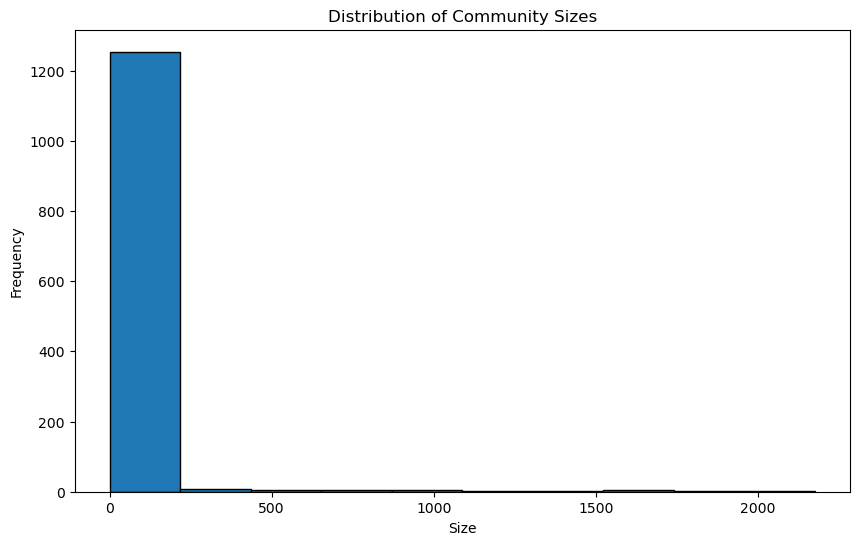

Average community size: 25.618492618492617
Standard deviation of sizes: 170.37410201846419
Large communities (sizes): [1531, 1370, 1681, 1678, 933, 750, 467, 1566, 641, 2175, 1853, 1627, 1385, 744, 1010, 711, 630, 731, 1184, 1166, 1153, 690, 392, 884, 961, 430, 886, 444]
Small communities (sizes): []
Minimum community size: 1
Maximum community size: 2175


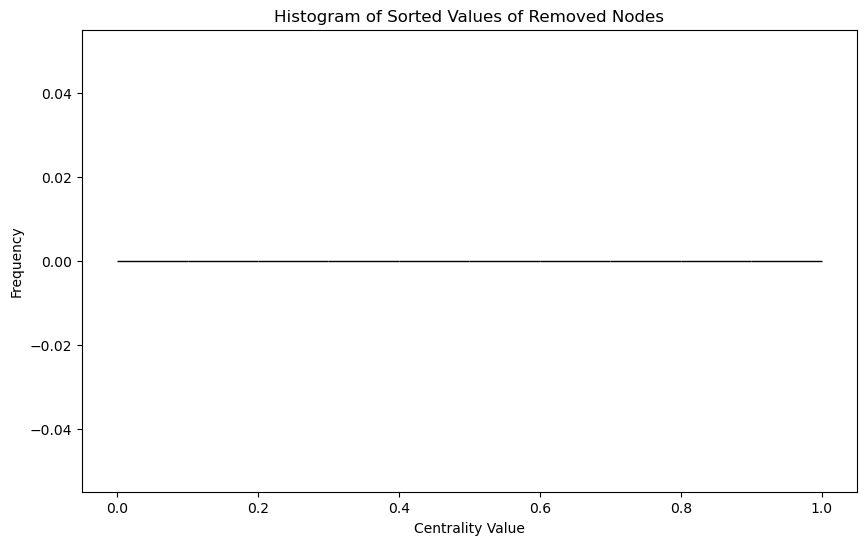

In [25]:
analyze_graph_and_communities(G, degree_centrality, method='std_dev', num_std_dev=1)

Size of the cleaned graph: 32976
Original graph size: 34727

The modularity of the original Graph: 0.47229395845333
The modularity of the cleaned Graph: 0.7253478126588984



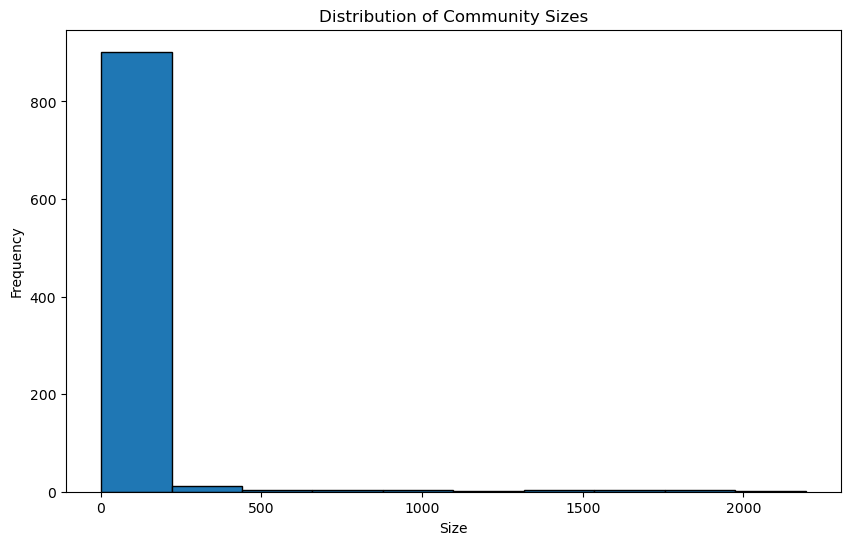

Average community size: 35.23076923076923
Standard deviation of sizes: 204.73733994924757
Large communities (sizes): [953, 1377, 1682, 1811, 1732, 680, 814, 1461, 1165, 2194, 614, 1868, 1387, 775, 902, 1619, 1174, 1797, 1020, 610, 510, 843, 891]
Small communities (sizes): []
Minimum community size: 1
Maximum community size: 2194


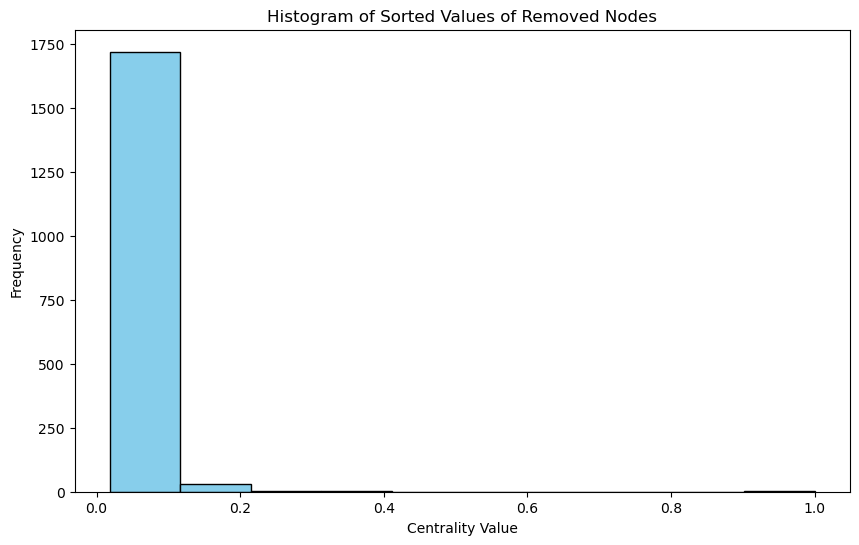

In [26]:
analyze_graph_and_communities(G, degree_centrality, method='percentile', top_percentile=95)

Size of the cleaned graph: 34715
Original graph size: 34727

The modularity of the original Graph: 0.47229395845333
The modularity of the cleaned Graph: 0.4775382291756496



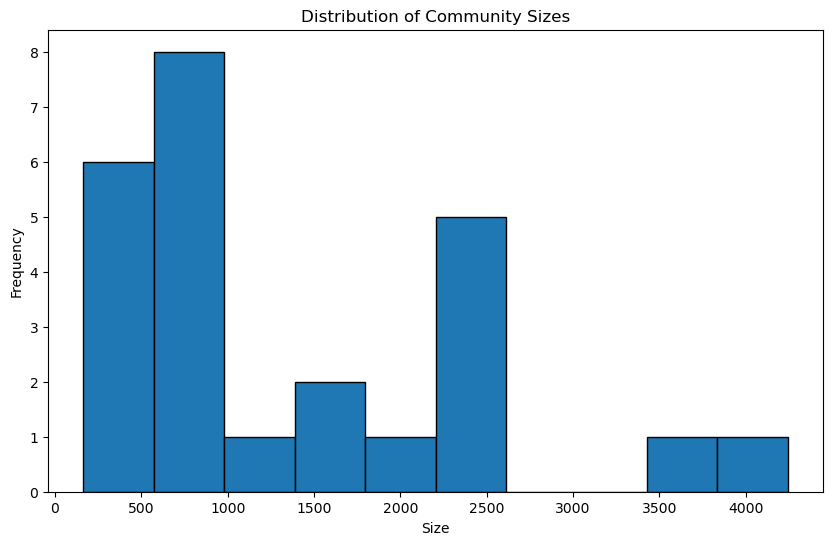

Average community size: 1388.6
Standard deviation of sizes: 1042.167625672569
Large communities (sizes): [4244, 3491]
Small communities (sizes): []
Minimum community size: 164
Maximum community size: 4244


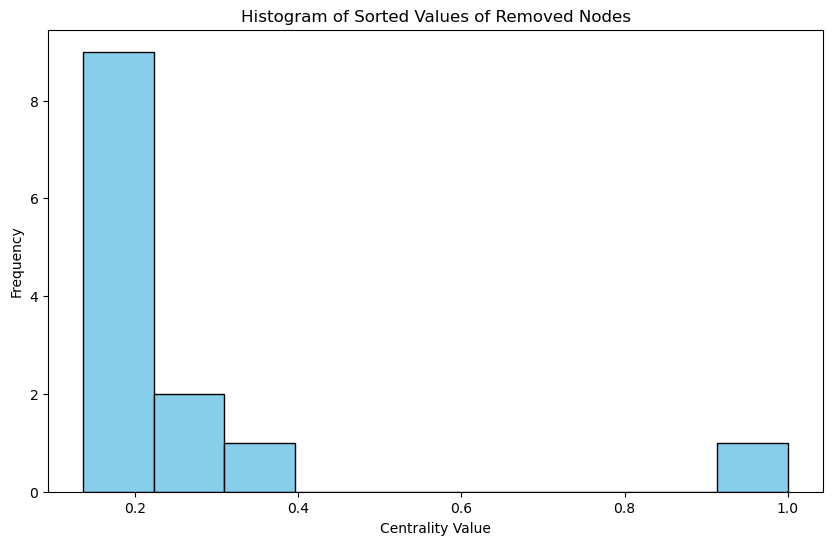

In [27]:
analyze_graph_and_communities(G, degree_centrality, method='top_n', top_n=13)

In [28]:
y = sorted(list(degree_centrality.values()), reverse=True)
x = np.arange(0, len(y))

In [29]:
len(y)

34727

In [30]:
x

array([    0,     1,     2, ..., 34724, 34725, 34726])

In [31]:
from kneed import KneeLocator
import numpy as np

# Example data: degree centrality values sorted in descending order
x = np.arange(0, 100)  # indices of nodes
y = np.sort(np.random.rand(100))[::-1]  # simulated degree centrality values

# Instantiate the KneeLocator
knee = KneeLocator(x, y, curve='convex', direction='decreasing')

# Finding the elbow
elbow_point = knee.knee
print(f"The elbow is located at index: {elbow_point}, Degree centrality: {y[elbow_point]}")


The elbow is located at index: 1, Degree centrality: 0.9798723207760438


The elbow is located at index: 13, Degree centrality: 0.13513513513513514


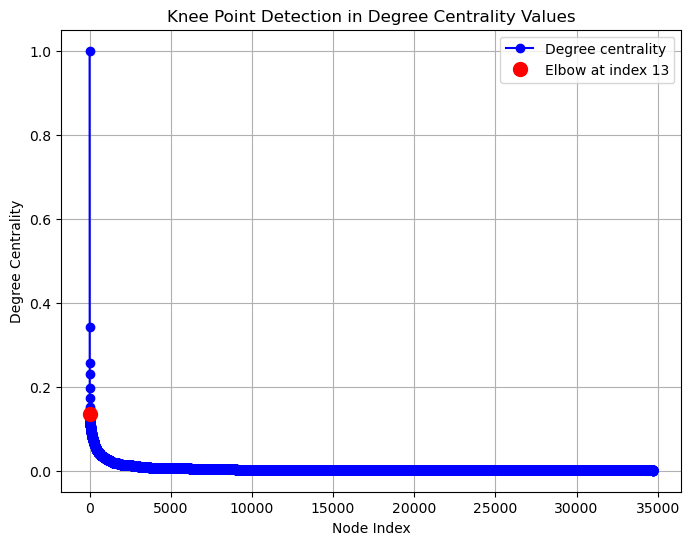

In [32]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Example data: degree centrality values sorted in descending order
y = sorted(list(degree_centrality.values()), reverse=True)
x = np.arange(0, len(y))

# Instantiate the KneeLocator
knee = KneeLocator(x, y, curve='convex', direction='decreasing')

# Finding the elbow
elbow_point = knee.knee
print(f"The elbow is located at index: {elbow_point}, Degree centrality: {y[elbow_point]}")

# Plotting the degree centrality values
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', marker='o', label='Degree centrality')
plt.xlabel('Node Index')
plt.ylabel('Degree Centrality')
plt.title('Knee Point Detection in Degree Centrality Values')

# Highlighting the knee point
plt.plot(elbow_point, y[elbow_point], 'ro', markersize=10, label=f'Elbow at index {elbow_point}')
plt.legend()
plt.grid(True)
plt.show()
